1. Generate a 1000 point digital signal that simulates an analog signal, consisting of a sine
wave at 30.76 hertz, being sampled at 1 kHz for 1 second. Plot this digital signal with
the x-axis labeled "time", running from 0 to 1 second.

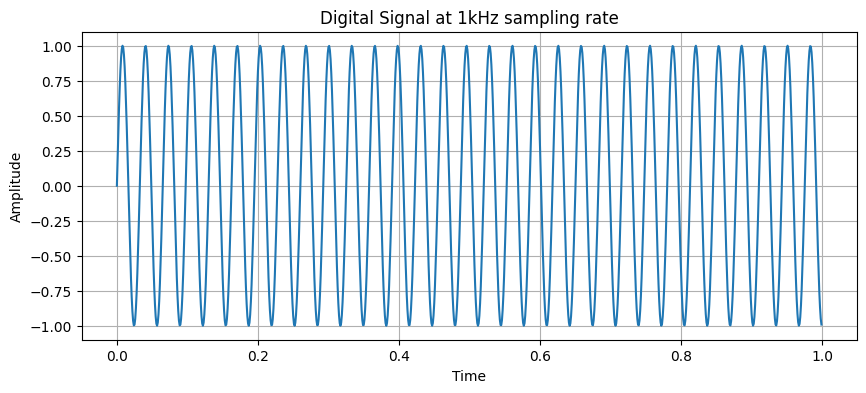

In [1]:
import numpy as np
import matplotlib.pyplot as plt

frequency = 30.76
sampling_rate = 1000
t = np.linspace(0, 1, sampling_rate, endpoint=False)
y = np.sin(2 * np.pi * frequency * t)

plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title('Digital Signal at 1kHz sampling rate')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

2. Simulate sampling the analog signal at 200 Hz, by discarding every 4 out of 5 samples
from the digital signal you created in step 1.

a. By discarding every 4 out of 5 samples, you're effectively down-sampling the signal to 200Hz.

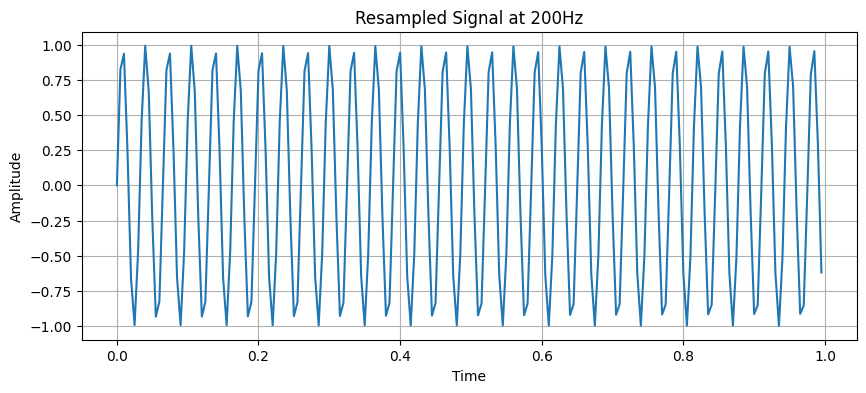

In [2]:
y_resampled = y[::5]
t_resampled = t[::5]

plt.figure(figsize=(10, 4))
plt.plot(t_resampled, y_resampled)
plt.title('Resampled Signal at 200Hz')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

b. Теорема выборки Найквиста-Шеннона утверждает, что непрерывный сигнал может быть полностью описан его выборками и полностью восстановлен, если его частота дискретизации превышает в два раза максимальную частотную составляющую сигнала. В нашем случае у нас есть синусоидальное колебание с частотой 30,76 Гц, что означает, что его следует дискретизировать на частоте более чем 61,52 Гц для предотвращения алиасинга. Поскольку мы дискретизируем на 200 Гц, что больше чем 61,52 Гц, алиасинга не произошло.

c. Учитывая, что алиасинг не произошел, исходный аналоговый сигнал действительно может быть восстановлен из этого цифрового сигнала с использованием соответствующих методов интерполяции.

3. Take a signal(can load an audio file), create highpass, lowpass and bandpass filters and
pass the signal through the filters. Do some experiments with different frequencies.

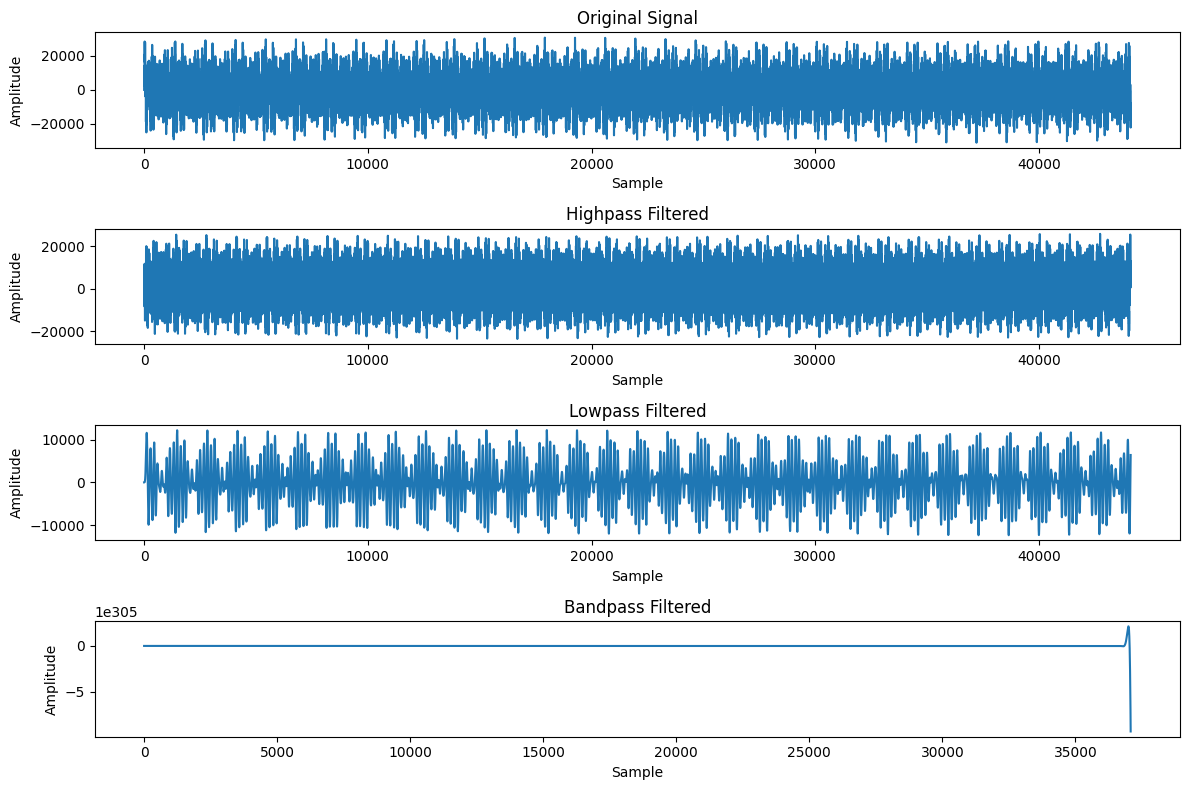

In [3]:
import scipy.io.wavfile as wav
from scipy.signal import butter, lfilter

rate, data = wav.read('/content/SineWaveChord_MinFreq261_MaxFreq4186_2secs.wav')

def highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a

b_high, a_high = highpass(300, rate)
filtered_high = lfilter(b_high, a_high, data)

b_low, a_low = lowpass(300, rate)
filtered_low = lfilter(b_low, a_low, data)

b_band, a_band = bandpass(100, 400, rate)
filtered_band = lfilter(b_band, a_band, data)

plt.figure(figsize=(12, 8))

plt.subplot(4,1,1)
plt.plot(data[:rate])
plt.title('Original Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4,1,2)
plt.plot(filtered_high[:rate])
plt.title('Highpass Filtered')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4,1,3)
plt.plot(filtered_low[:rate])
plt.title('Lowpass Filtered')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4,1,4)
plt.plot(filtered_band[:rate])
plt.title('Bandpass Filtered')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


4. Create a message signal and a carrier signal, implement FM, PM and FM.

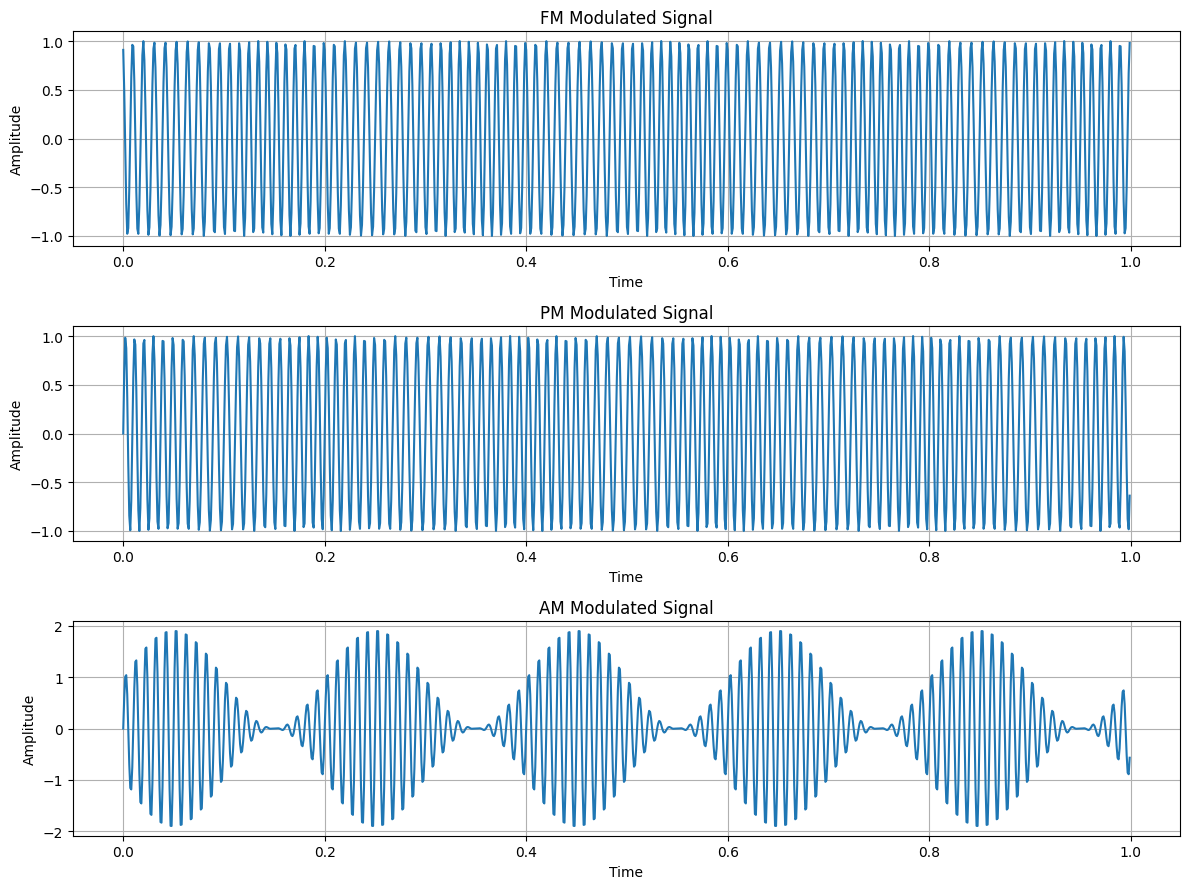

In [5]:
def fm_modulate(carrier_freq, modulating_signal, modulating_freq, modulation_index, t):
    modulated_signal = np.sin(2 * np.pi * carrier_freq * t + modulation_index * np.cos(2 * np.pi * modulating_freq * t))
    return modulated_signal

def pm_modulate(carrier_freq, modulating_signal, modulation_index, t):
    modulated_signal = np.sin(2 * np.pi * carrier_freq * t + modulation_index * modulating_signal)
    return modulated_signal

def am_modulate(carrier_freq, modulating_signal, t):
    carrier = np.sin(2 * np.pi * carrier_freq * t)
    modulated_signal = (1 + modulating_signal) * carrier
    return modulated_signal

am_signal = am_modulate(carrier_freq, modulating_signal, t)

pm_signal = pm_modulate(carrier_freq, modulating_signal, modulation_index, t)


carrier_freq = 100
modulating_signal = np.sin(2 * np.pi * 5 * t)
modulating_freq = 5
modulation_index = 2.0

fm_signal = fm_modulate(carrier_freq, modulating_signal, modulating_freq, modulation_index, t)

plt.figure(figsize=(12, 9))

# Plot FM signal
plt.subplot(3,1,1)
plt.plot(t, fm_signal)
plt.title('FM Modulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot PM signal
plt.subplot(3,1,2)
plt.plot(t, pm_signal)
plt.title('PM Modulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot AM signal
plt.subplot(3,1,3)
plt.plot(t, am_signal)
plt.title('AM Modulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()
